# Lesson 01: Electron Lifetime
### Dylan Temples 
June 17, 2019

The goal of this lesson is to illustrate the electron lifetime calibration and correction as performed in LXe-TPCs.

## Learning Objectives
Physics Topics:
- Energy deposition in LXe
- Electroluminesence gain
- Concepts of "cuts" and "corrections"

Programming Topics:
- Using git [?]
- Working with arrays
- Visualizing data
- Fitting data

## Energy Deposition in Liquid Xenon
When ionizing radiation passes through liquid xenon (LXe), it causes the xenon atoms to produce scintillation light and ionization electrons. Dual-phas xenon time-projection chambers (LXe-TPCs) use photodetectors (usually photomultiplier tubes, PMTs) to read out these signals.

If the average amount of energy required to produce a single quanta (one photon or one electron) is $W$, then the energy of a specific recoil in LXe is:
$$ E = W (n_\gamma + n_e ) $$
where $n_\gamma(n_e)$ is the number of photons(electrons) produced at the interaction site.

The scintillation photons are detected with imperfect efficiency in the PMTS and produce the S1 signal. We can paramterize this uncertainty with a gain factor $g_1$:
$$ n_\gamma = \frac{S1}{g_1} $$
with $0 \le g_1 \le 1$.

All the while, the electrons that were released at the interaction site experience a force due to the applied electric field:
$$ \mathbf{F}_e = (-e)\mathbf{E} = e E_0 \hat{\mathbf{z}} $$
and begin to drift upward to the liquid surface. Here they see a stronger electric field and are extracted into the gas phase, where they are accelerated until they are collected on the anode. While they accelerate, they produce secondary scintillation photons, this phenomenon is known as electroluminesence. These secondary scintillations photons produce the S2 signal which is proportional to the number of ionization electrons produced in the interaction.

Again we can parameterize this proportionality with a gain $g_2$:
$$ n_e = \frac{S2}{g_2} $$
where $g_2$ takes into account: the average number of photons produced per extrated electron and light collection efficiency in the gas phase.

With these two gain factors, we can write the energy deposited in the detector in terms of our observables:
$$ E = W \left( \frac{S1}{g_1} + \frac{S2}{g_2} \right) $$

## Electron Drift in LXe
The gain factor $g_2$ relies on the fact that every electron that was produced at the interaction site made it to the liquid surface and was extracted. In reality, it is not always true that every electron makes it to the liquid surface.

Impurities in the LXe (especially O$_2$ and N$_2$) can hold on to drifting electrons, and thus the number of electrons that are extracted $N_\mathrm{obs}$ is less than the number of electrons produced $N_e$. The concentration of impurities in the xenon determines the ratio of the two numbers. 

This means that as the electrons are traveling, there is some probability they are absorbed by impurities. You can define some scale length that is the most probable distance an electron will travel before it is absorbed. Since the electrons are drifting at a constant speed\*, we can turn this into a "lifetime" $\tau$.

This leads naturally to the concept of an exponential decay, where the number of electrons that make it to the liquid surface is less than the number of electrons that were produced by a factor that scales exponentially with the amount of time the electrons are in the LXe:
$$ N_\mathrm{obs} = N_e e^{- t_\mathrm{drift} / \tau } $$

Thus at any given time, if you know the electron lifetime in the LXe, you can correct for the effects of the impurities:
$$ E = W \left( \frac{S1}{g_1} + \frac{S2_\mathrm{obs}e^{t_\mathrm{drift} / \tau}}{g_2} \right) $$

## Electron Lifetime Calibration
To be able to apply the above correction, one must know the electron lifetime. This can be found by doing a calibration with an internal, monoenergetic source ($^{83m}$Kr is typically used). The reason for this is you want the source to be homogenously distributed throughout your detector volume, most importantly uniform along $z$.

In the limit of perfectly pure LXe, the observed $S2$ size should only be a function of the energy deposited in the LXe, up to statistical fluctuations\*. Thus for a homogenously distributed monoenergetic source, you should see the same size $S2$ as a function of location in the detector.

But given the impurities in the xenon, what you observe is an S2 size that exponentially decays with depth in the detector. One can fit this decay to determine the lifetime.

## Git: How to get this file
The most common way of doing collaborative code development and version control is using git (ex: GitHub, GitLab). I have created a git repository that will be used for these lessons: https://github.com/dtemps123/HS_Lessons

To obtain your own copy of this repository, enter the following commands (note this is for Linux only, Windows and Mac users will need to figure it out themselves).

To copy the directory:

`git clone https://github.com/dtemps123/HS_Lessons.git`

To create your own branch:

`git checkout -b <branch-name-here>`

`git commit -A -m "start my branch"`

`git push origin <branch-name-here>`

In this directory (`HS_Lessons/Lesson01`) you will notice a data file: `rawdaq_1901021108_electronlifetime.dat`. This file contains reduced quantities from a data run that was processed using the XELDA data processing software. It is four columns of data: event ID, drift time, S2 size, radius-squared.

## Visualizing the data
First we should import the libraries we think we will need and then we can open the data and start visualizing.

In [7]:
# -- Import the libraries
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# -- Open the data
filename = "rawdaq_1901021108_electronlifetime.dat"
data = np.loadtxt(filename, delimiter=",")

In [10]:
# -- Check the size of the data
n_cols = len(data[0,:])
print("The number of columns in the data is: "+str(n_cols))
for i in np.arange(n_cols):
    n_rows = len(data[:,i])
    print("The number of rows in column "+str(i)+" is: "+str(n_rows))

The number of columns in the data is: 4
The number of rows in column 0 is: 11485
The number of rows in column 1 is: 11485
The number of rows in column 2 is: 11485
The number of rows in column 3 is: 11485


The data has the number of columns we expect and has 11485 entries in each column, so we don't have to worry about jaggedness.

Let us first look and see what the distribution of our S2 sizes look like. For this we will use a histogram.

Text(0, 0.5, 'Counts per bin')

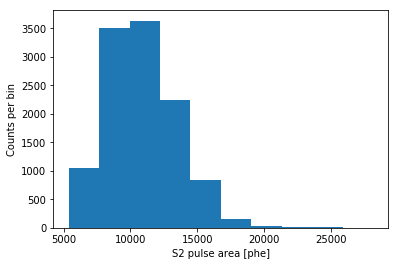

In [11]:
# -- Create a histogram of S2 size
plt.figure(0)
plt.hist(data[:,2])
plt.xlabel("S2 pulse area [phe]")
plt.ylabel("Counts per bin")

From the shape of the above distribution it can be determined we are looking at a monoenergetic source. In fact, this data is from $^{127}$Xe data, and has been cut around the $K$-shell electron capture peak.

For the purposes of this calibration, we are interested in the distribution of S2 sizes as a function of depth, or drift time. Just as we did to visualize one column of data, we can create a histogram in two dimensions to look at two columns of data.

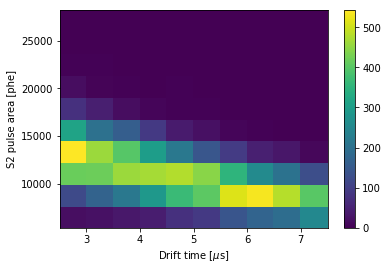

In [44]:
# -- Create a 2D histogram of S2 size vs drift time
plt.figure(1)
h, xedges, yedges, img = plt.hist2d(data[:,1],data[:,2])
plt.xlabel(r"Drift time [$\mu$s]")
plt.ylabel("S2 pulse area [phe]")
plt.colorbar()

What if we wanted to know the means and standard deviations of the S2 values in each drift time bin?

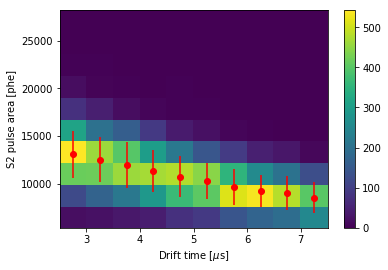

In [49]:
# -- Calculate mu, sigma of S2 for each DT bin
n_dt_bins = len(h[0,:])
means = np.zeros(n_dt_bins)
sdevs = np.zeros(n_dt_bins)
for i in np.arange(n_dt_bins):
    indeces_of_bin = (data[:,1]>=xedges[i]) * (data[:,1]<xedges[i+1])
    S2s_in_bin = data[:,2][indeces_of_bin]
    means[i] = np.mean(S2s_in_bin)
    sdevs[i] = np.std(S2s_in_bin)
    
# -- Get the drift time bin centers
dt_bin_centers = (xedges[1:len(xedges)] + xedges[0:len(xedges)-1])/2.
    
# -- Plot them as errorbars on top of histogram
plt.figure(2)
plt.hist2d(data[:,1],data[:,2])
pyp.errorbar(dt_bin_centers, means, yerr=sdevs, fmt='o', color='r')
plt.xlabel(r"Drift time [$\mu$s]")
plt.ylabel("S2 pulse area [phe]")
plt.colorbar()